###  Libraries

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_kernels
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tslearn.clustering import KernelKMeans as TSKernelKMeans
from KernelKMeans import KernelKMeans
from GlobalKernelKMeans import GlobalKernelKMeans, GlobalKernelKMeansPP 
from Rings import Rings
from Common_Modules.Evaluation import Evaluator
from Common_Modules.Graph import Graph

c:\Users\PAPASOFT INC\AppData\Local\Programs\Python\Python311\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


### Global Variables

In [2]:
seed = 42
evaluator = Evaluator()
graph_is_enabled = True
kMeans_is_enabled = False
kernelKMeans_is_enabled = False
kernelKMeansPP_is_enabled = True
globalKernelKMeans_is_enabled = False
globalKernelKMeansPP_is_enabled = True

### Load Dataset

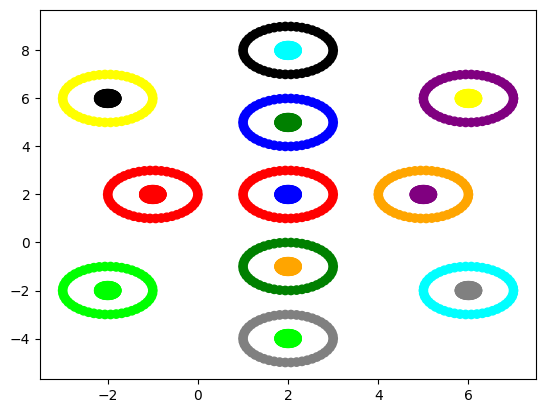

In [3]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'black', 'cyan', 'gray', 'lime']

# Generate 5 pairs of data with specified center positions and unique IDs for each ring
centers_coordinates = [(-1, 2), (2, 2), (2, 5), (2, -1), (5, 2), (6, 6), (-2, 6), (2, 8), (6, -2), (2, -4), (-2, -2)]  # Specify center positions for each pair
#centers_coordinates = [(2, 2), (-2, 2)]
rings = Rings()

X, y = rings.make_rings_pairs(centers_coordinates=centers_coordinates, n_samples=100, factor=0.2, noise=0.0)

#X, y = rings.remove_samples_with_specific_label(X, y, 3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors))

In [4]:
K = 22
kernel_matrix = pairwise_kernels(X, X, metric='rbf', gamma=1)
print(kernel_matrix[0][i] for i in range(50))

<generator object <genexpr> at 0x000001757CB75970>


### Create Graph

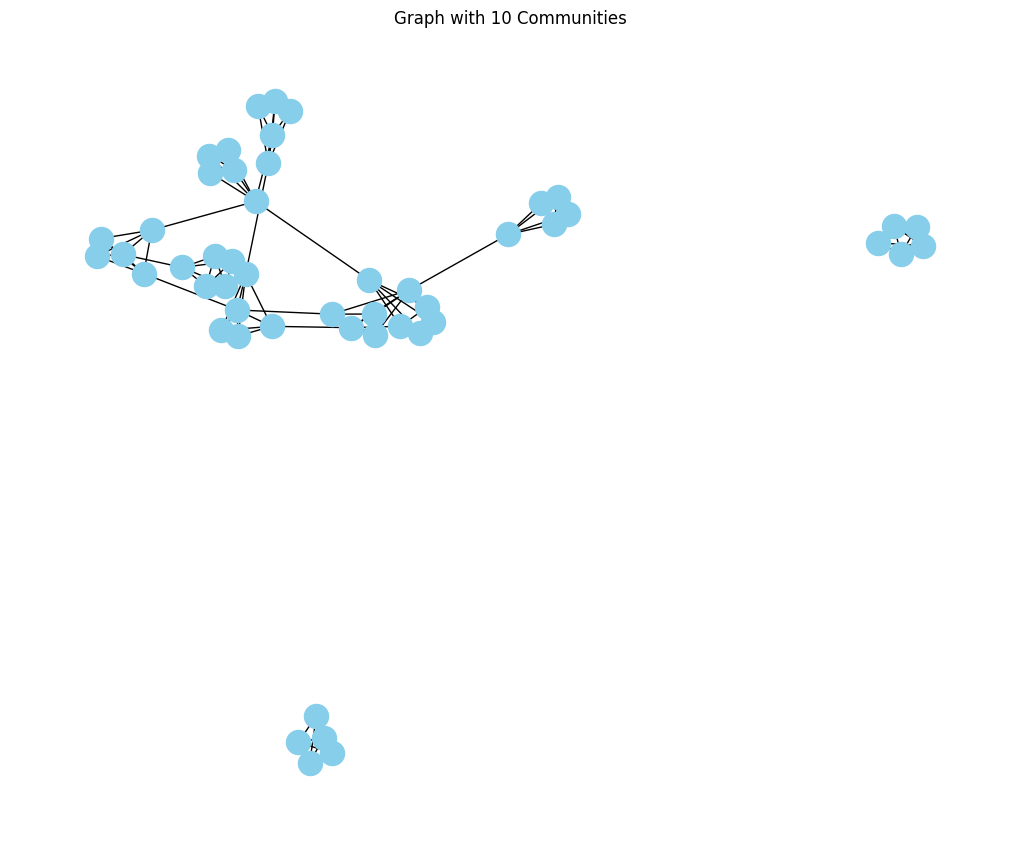

[[ 4.61016614e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   8.36613573e-11  1.42030979e-10]
 [ 1.00000000e+00  4.61016614e+00  1.00000000e+00 ... -1.39477592e-10
  -3.34579873e-11 -2.49420904e-11]
 [ 1.00000000e+00  1.00000000e+00  4.61016614e+00 ... -1.03096691e-10
   6.29152400e-11 -2.53044700e-11]
 ...
 [ 1.00000000e+00 -1.69782850e-11 -2.19940245e-10 ...  4.61016614e+00
   1.00000000e+00  1.00000000e+00]
 [ 3.83422089e-11  1.57032220e-10  4.96091102e-11 ...  1.00000000e+00
   4.61016614e+00  1.00000000e+00]
 [-1.32401572e-10 -1.06100882e-11 -3.07745071e-11 ...  1.00000000e+00
   1.00000000e+00  4.61016614e+00]]


In [5]:
# Number of nodes per community
n_nodes_per_community = 5

# Number of communities
n_communities = 10

# Probability matrix for inter-community edges
# Adjust these probabilities as desired
p_intra = 1  # Probability of intra-community edge
p_inter = 0.01  # Probability of inter-community edge

graph = Graph(n_communities, n_nodes_per_community, p_intra, p_inter, colors)

def generate_random_array(n, sigma):
    # Generate random values from a standard normal distribution
    random_values = np.random.randn(n, n)
    
    # Scale the values to be between 0 and sigma
    scaled_values = - sigma * random_values
    
    return scaled_values
random_array = generate_random_array(n_communities*n_nodes_per_community, 1e-10)
graph.create_adj_matrix()
graph.adj_matrix = np.add(graph.adj_matrix, random_array)
kernel_matrix = graph.create_kernel_matrix_from_adj_matrix(b=1e-100)
print(kernel_matrix)

### kMeans

In [6]:
if(kMeans_is_enabled):
    kmeans = KMeans(n_clusters=K).fit(X)
    acc, pur, nmi, ari = evaluator.evaluate_model(y, kmeans.labels_)
    evaluator.print_evaluation()
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=ListedColormap(colors))

### Kernel kMeans

In [7]:
if(kernelKMeans_is_enabled):
    kernel_kmeans = TSKernelKMeans(n_clusters=K, n_init=10, kernel='precomputed').fit(kernel_matrix)
    acc, pur, nmi, ari = evaluator.evaluate_model(y, kernel_kmeans.labels_)
    evaluator.print_evaluation()
    plt.scatter(X[:, 0], X[:, 1], c=kernel_kmeans.labels_, cmap=ListedColormap(colors))
    plt.show()

### Kernel kMeans++

Execution 0 of Kernel k-Means with k-means++ initialization
Finished in Iter: 1 Cl L: 160.0416
Execution 1 of Kernel k-Means with k-means++ initialization
Finished in Iter: 1 Cl L: 170.0971
Execution 2 of Kernel k-Means with k-means++ initialization
Finished in Iter: 1 Cl L: 166.4289
Execution 3 of Kernel k-Means with k-means++ initialization
Finished in Iter: 1 Cl L: 163.2400
Execution 4 of Kernel k-Means with k-means++ initialization
Finished in Iter: 1 Cl L: 159.7495
Execution 5 of Kernel k-Means with k-means++ initialization
Finished in Iter: 1 Cl L: 160.7233
Execution 6 of Kernel k-Means with k-means++ initialization
Finished in Iter: 1 Cl L: 162.7638
Execution 7 of Kernel k-Means with k-means++ initialization
Finished in Iter: 1 Cl L: 164.2233
Execution 8 of Kernel k-Means with k-means++ initialization
Finished in Iter: 1 Cl L: 165.2471
Execution 9 of Kernel k-Means with k-means++ initialization
Finished in Iter: 1 Cl L: 167.0066


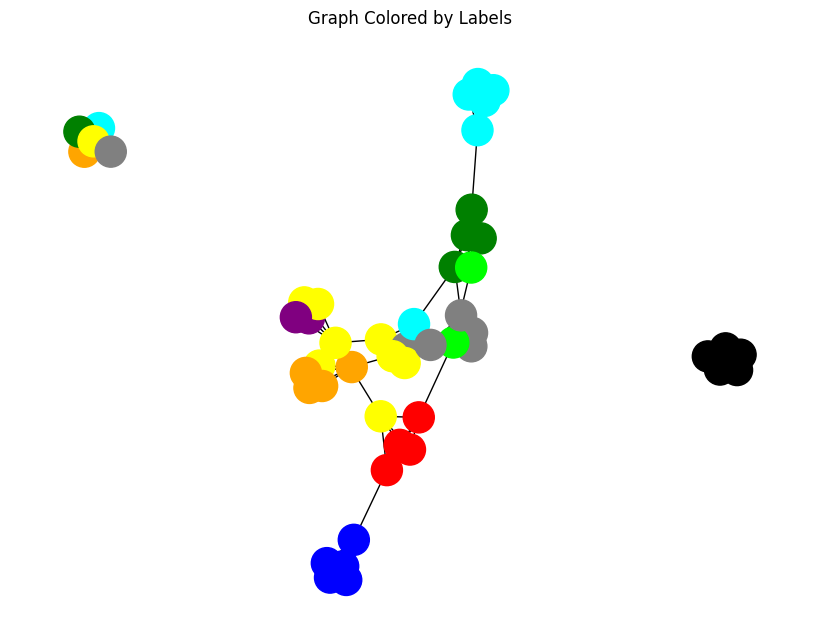

In [8]:
K = 10
if(kernelKMeansPP_is_enabled):
    kernelKMeans = KernelKMeans(n_clusters=K, kernel_matrix=kernel_matrix, n_init=10, init='k-means++', verbose=1)
    kernelKMeans.fit()
    
    if graph_is_enabled:
        graph.plot_clusters(kernelKMeans.labels_)
    else:
        acc, pur, nmi, ari = evaluator.evaluate_model(y, kernelKMeans.labels_)
        evaluator.print_evaluation()
        plt.scatter(X[:, 0], X[:, 1], c=kernelKMeans.labels_, cmap=ListedColormap(colors))
        plt.title(kernelKMeans.inertia_)
        plt.show()

        # That's the function of grount truth error
        ground_truth_error = kernelKMeans.calculate_ground_truth_error(y)
        print(f"Ground Truth Error is: {ground_truth_error}")

### Global Kernel kMeans

Solving Kernel 2-means
Solved 2-means MSE: 216.9614440317651
Solving Kernel 3-means
Solved 3-means MSE: 212.3861418389361
Solving Kernel 4-means
Solved 4-means MSE: 207.76977002679357
Solving Kernel 5-means
Solved 5-means MSE: 203.1096501418792
Solving Kernel 6-means
Solved 6-means MSE: 198.40286564611614
Solving Kernel 7-means
Solved 7-means MSE: 193.87350758831957
Solving Kernel 8-means
Solved 8-means MSE: 189.30139641801705
Solving Kernel 9-means
Solved 9-means MSE: 184.68347834153354
Solving Kernel 10-means
Solved 10-means MSE: 180.01640163395646


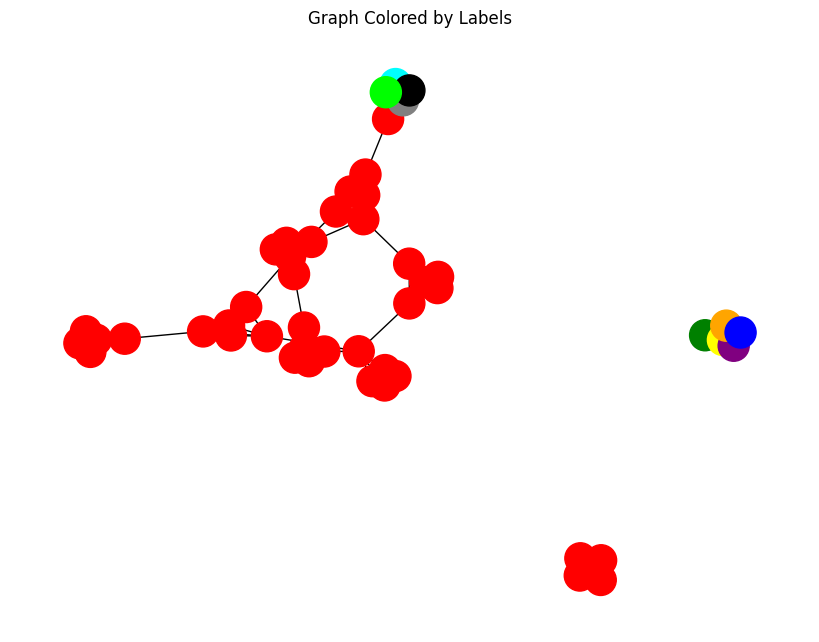

In [9]:
K = 10
if(True):
    globalKernelKMeans = GlobalKernelKMeans(n_clusters=K, kernel_matrix=kernel_matrix, verbose=1)
    globalKernelKMeans.fit()

    if graph_is_enabled:
        graph.plot_clusters(globalKernelKMeans.labels_[K])
    else:
        acc, pur, nmi, ari = evaluator.evaluate_model(y, globalKernelKMeans.labels_[K])
        evaluator.print_evaluation()
        plt.scatter(X[:, 0], X[:, 1], c=globalKernelKMeans.labels_, cmap=ListedColormap(colors))
        plt.show()

### Global Kernel kMeans++

Solving 2-means
Solved 2-means MSE: 216.96144403179846
Solving 3-means
Solved 3-means MSE: 212.4278085054003
Solving 4-means
Solved 4-means MSE: 207.85487640968677
Solving 5-means
Solved 5-means MSE: 203.28356318516478
Solving 6-means
Solved 6-means MSE: 198.71397675679032
Solving 7-means
Solved 7-means MSE: 194.10078031535429
Solving 8-means
Solved 8-means MSE: 189.44093130161528
Solving 9-means
Solved 9-means MSE: 184.7310973889246
Solving 10-means
Solved 10-means MSE: 180.06518212161575


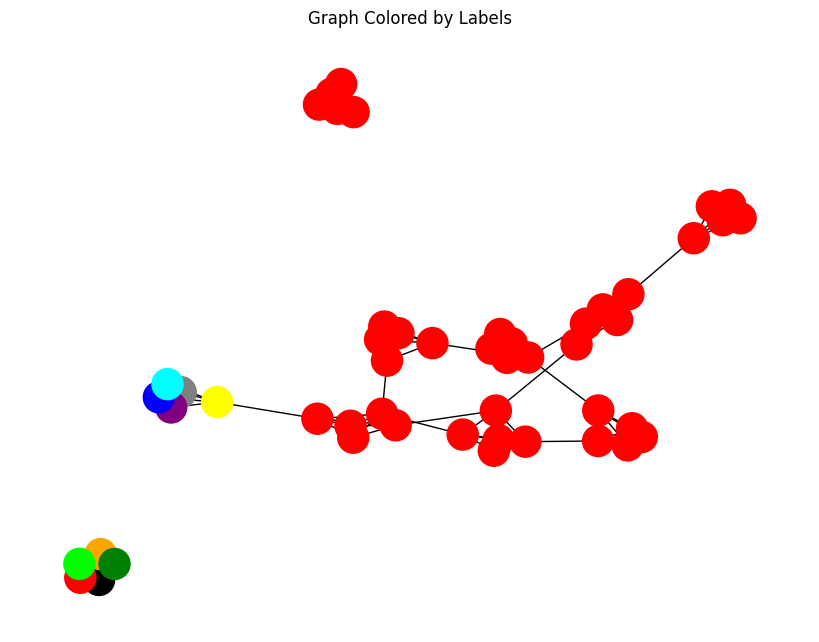

In [10]:
K = 10
if(globalKernelKMeansPP_is_enabled):
    globalKernelKMeansPP = GlobalKernelKMeansPP(n_clusters=K, kernel_matrix=kernel_matrix, n_candidates=10, sampling='batch', verbose=1)
    globalKernelKMeansPP.fit()
    
    if graph_is_enabled:
        graph.plot_clusters(globalKernelKMeansPP.labels_[K])
    else:
        acc, pur, nmi, ari = evaluator.evaluate_model(y, globalKernelKMeansPP.labels_[K])
        evaluator.print_evaluation()
        plt.scatter(X[:, 0], X[:, 1], c=globalKernelKMeansPP.labels_, cmap=ListedColormap(colors))
        plt.show()